# Dirichlet Distribution

In [364]:
from IPython.display import  HTML

def load_d3_in_cell_output():
  display(HTML("<script src='https://d3js.org/d3.v6.min.js'></script>"))
get_ipython().events.register('pre_run_cell', load_d3_in_cell_output)

## The Chinese Restaurant Process

In the thought problem, we will be examing a situation where a hungery person (🤔) enters a restrauant and needs to choose a table (⚪).

This original was developed by xxx and a great resource to consider is Pasupat's (xxx).

Here are the ground rules for this thought problem.
  

## Rules for Our Thought Problem

### 1. An Infinite Amount of Tables (⚪)

We are depicting five tables (⚪⚪⚪⚪⚪) but we need to consider a situation where the number of tables are infinite. 

* ⚪ = ∞

### 2. A Hungry Person (🤔) Only Two Options

When a hungry person (🤔) walks into the the restraunt they have two options: 
    
* Either they sit a table (⚪) with someone else (😃) 
* or pick a new table  (⚪) 

To simplify this, here a decision chart. 

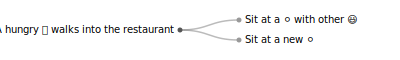

In [365]:
from IPython.display import SVG, display
display(SVG(url='https://raw.githubusercontent.com/dudaspm/LDA_Bias_Data/main/images/startCondition.svg'))

And to further reduce this down, we will be using this:

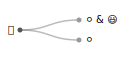

In [366]:
from IPython.display import SVG, display
display(SVG(url='https://raw.githubusercontent.com/dudaspm/LDA_Bias_Data/main/images/simpleStartCondition.svg'))

### 3. Many ⚪ & 😃, Only One Empty ⚪

This goes with #2, but in our scenario there will number of tables (⚪) with people (😃), but when considering an empty table (⚪). We will only consider *one* of the infinite number of tables (⚪) open. Another way to consider this is either a hungry person (🤔):
* sits at the *one of possible many* tables (⚪) with someone else (😃) 
* *OR* they sit at the *one* new table  (⚪)

### All Tables (⚪) are Equal
Notice that all the tables are equal distance away. So, there is no weighting based on the distance and each table is equally likely to be picked.     

In [367]:
%%html
<input type="button" onclick="runWeight()" value="Run Animation">
<div id="runWeight"></div>

<script type="text/javascript">   
    function runWeight() {
        var width = 500
        var height = 270
        var margin = 35
        var radius = 200
        
        d3.select("div#runWeight").select("svg").remove()
        var svg1 = d3.select("div#runWeight").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg1.selectAll("line")
            .data(d3.range(5))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg1.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        svg1.append("text")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
    }
    runWeight()
</script>

### Key for Thought Problem

> 🤔 - hungry person
* The person who needs to find a seat at a table

> 😃 - person eating
* A person already at a table

> ⚪ - a possible table
* A potential seat for the hungry person to sit at

> ⚫ - a not possible table 
* Not a potential seat for the hungry person to sit at (see Rule #3)

## All Solutions 💥TO THE EXTREME💥

:::{note}
"To the extreme!" was a popular phrase from the early 1990s. Meaning "to take something to its furthest limits." Most credit [Robert Matthew Van Winkle](https://en.wikipedia.org/wiki/Vanilla_Ice) for the phrase. 
:::

Now that we have our ground rules, let's approach this problem from, what I am calling, the extreme positions. Up to this point, we have not mentioned a single bit of math, but this section will contain conversations around probabilities. Here are three scenarios for our extreme positions. 

1. The Social Butterfly
2. The Gambler
3. The Long Day

### 1. The Social Butterfly

The social butterfly assumes every person that enters the restraunts wants to sit at the table with the most people. 

In [368]:
%%html
<input type="button" onclick="social1()" value="Run Animation">
<div id="social1"></div>

<script type="text/javascript">   
    function social1() {
        var width = 500
        var height = 270
        var margin = 35
        var radius = 200
        
        d3.select("div#social1").select("svg").remove()
        var svg2 = d3.select("div#social1").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg2.selectAll("line")
            .data(d3.range(1))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg2.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1","0","0","0","0"]
        svg2.selectAll("text")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg2.append("text")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
    }
    social1()
</script>

In [369]:
%%html
<input type="button" onclick="social2()" value="Run Animation">
<div id="social2"></div>

<script type="text/javascript">   
    function social2() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#social2").select("svg").remove()
        var svg3 = d3.select("div#social2").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg3.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg3.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1/1","0","0","0","0"]
        svg3.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg3.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed")
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed")
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg3)
    }
    social2()
</script>

In [370]:
%%html
<input type="button" onclick="social3()" value="Run Animation">
<div id="social3"></div>

<script type="text/javascript">   
    function social3() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#social3").select("svg").remove()
        var svg4 = d3.select("div#social3").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg4.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg4.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["2/2","0","0","0","0"]
        svg4.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg4.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed")
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed")
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,2,svg4)
    }
    social3()
</script>

In [371]:
%%html
<input type="button" onclick="social4()" value="Run Animation">
<div id="social4"></div>

<script type="text/javascript">   
    function social4() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#social4").select("svg").remove()
        var svg5 = d3.select("div#social4").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg5.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg5.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["3/3","0","0","0","0"]
        svg5.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg5.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed")
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed")
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,3,svg5)
    }
    social4()
</script>

In [372]:
%%html
<input type="button" onclick="social5()" value="Run Animation">
<div id="social5"></div>

<script type="text/javascript">   
    function social5() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#social5").select("svg").remove()
        var svg6 = d3.select("div#social5").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg6.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg6.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["4/4","0","0","0","0"]
        svg6.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg6.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed")
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed")
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,4,svg6)
    }
    social5()
</script>

### 2. The Gambler

The Gambler is the person who only cares about the probabilites. Meaning, if there is two tables (xx), then they have a 50/50 choice, and they do not care at all about the people sitting there or not. 

In [373]:
%%html
<input type="button" onclick="gambler1()" value="Run Animation">
<div id="gambler1"></div>

<script type="text/javascript">   
    function gambler1() {
        var width = 500
        var height = 270
        var margin = 35
        var radius = 200
        
        d3.select("div#gambler1").select("svg").remove()
        var svg7 = d3.select("div#gambler1").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg7.selectAll("line")
            .data(d3.range(1))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg7.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1/1","0","0","0","0"]
        svg7.selectAll("text")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg7.append("text")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
    }
    gambler1()
</script>

In [374]:
%%html
<input type="button" onclick="gambler2()" value="Run Animation">
<div id="gambler2"></div>

<script type="text/javascript">   
    function gambler2() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#gambler2").select("svg").remove()
        var svg8 = d3.select("div#gambler2").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg8.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg8.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1/2","1/2","0","0","0"]
        svg8.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg8.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed")
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed")
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg8)
    }
    gambler2()
</script>

In [375]:
%%html
<input type="button" onclick="gambler3()" value="Run Animation">
<div id="gambler3"></div>

<script type="text/javascript">   
    function gambler3() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#gambler3").select("svg").remove()
        var svg9 = d3.select("div#gambler3").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])
        fractions = ["1/3","1/3","1/3","0","0"]
        svg9.selectAll("line")
            .data(d3.range(3))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg9.selectAll("circle")
            // Collect
            .data(fractions)
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (+d!=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        
        svg9.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg9.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg9,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg9,1)
    }
    gambler3()
</script>

In [376]:
%%html
<input type="button" onclick="gambler4()" value="Run Animation">
<div id="gambler4"></div>

<script type="text/javascript">   
    function gambler4() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#gambler4").select("svg").remove()
        var svg10 = d3.select("div#gambler4").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])
        fractions = ["1/4","1/4","1/4","1/4","0"]
        svg10.selectAll("line")
            .data(d3.range(4))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg10.selectAll("circle")
            // Collect
            .data(fractions)
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (+d!=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        
        svg10.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg10.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg10,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg10,1)
        var cx = ((radius) * Math.cos(x(2))) + (width/2)
        var cy = ((radius) * Math.sin(x(2))) + (height-margin)
        addPeople(cx,cy,1,svg10,2)
    }
    gambler4()
</script>

In [377]:
%%html
<input type="button" onclick="gambler5()" value="Run Animation">
<div id="gambler5"></div>

<script type="text/javascript">   
    function gambler5() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#gambler5").select("svg").remove()
        var svg11 = d3.select("div#gambler5").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])
        fractions = ["1/5","1/5","1/5","1/5","1/5"]
        svg11.selectAll("line")
            .data(d3.range(5))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg11.selectAll("circle")
            // Collect
            .data(fractions)
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (+d!=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        
        svg11.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg11.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg11,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg11,1)
        var cx = ((radius) * Math.cos(x(2))) + (width/2)
        var cy = ((radius) * Math.sin(x(2))) + (height-margin)
        addPeople(cx,cy,1,svg11,2)
        var cx = ((radius) * Math.cos(x(3))) + (width/2)
        var cy = ((radius) * Math.sin(x(3))) + (height-margin)
        addPeople(cx,cy,1,svg11,3)
    }
    gambler5()
</script>

### 3. The Long Day

The Long Day scenerio describes a situation where customers (xx) coming into the restraunt had a reeeeeeeeeeeeeeeally long day. All they want is a table (xx) to themselves to eat their food, pay, and go home. This is the opposite of the Social Butterfly, where if there are people at a table (😃 & xx). They will find an empty table (xxx).


In [378]:
%%html
<input type="button" onclick="long1()" value="Run Animation">
<div id="long1"></div>

<script type="text/javascript">   
    function long1() {
        var width = 500
        var height = 270
        var margin = 35
        var radius = 200
        
        d3.select("div#long1").select("svg").remove()
        var svg12 = d3.select("div#long1").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg12.selectAll("line")
            .data(d3.range(1))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg12.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1/1","0","0","0","0"]
        svg12.selectAll("text")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg12.append("text")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
    }
    long1()
</script>

In [379]:
%%html
<input type="button" onclick="long2()" value="Run Animation">
<div id="long2"></div>

<script type="text/javascript">   
    function long2() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#long2").select("svg").remove()
        var svg13 = d3.select("div#long2").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg13.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg13.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["0","1/1","0","0","0"]
        svg13.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg13.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg13,0)

    }
    long2()
</script>

In [380]:
%%html
<input type="button" onclick="long3()" value="Run Animation">
<div id="long3"></div>

<script type="text/javascript">   
    function long3() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#long3").select("svg").remove()
        var svg14 = d3.select("div#long3").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg14.selectAll("line")
            .data(d3.range(3))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg14.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=2)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["0","0","2/2","0","0"]
        svg14.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg14.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg14,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg14,1)

    }
    long3()
</script>

In [381]:
%%html
<input type="button" onclick="long4()" value="Run Animation">
<div id="long4"></div>

<script type="text/javascript">   
    function long4() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#long4").select("svg").remove()
        var svg15 = d3.select("div#long4").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg15.selectAll("line")
            .data(d3.range(4))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg15.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=3)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["0","0","0","1","0"]
        svg15.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg15.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg15,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg15,1)
        var cx = ((radius) * Math.cos(x(2))) + (width/2)
        var cy = ((radius) * Math.sin(x(2))) + (height-margin)
        addPeople(cx,cy,1,svg15,2)

    }
    long4()
</script>

In [382]:
%%html
<input type="button" onclick="long5()" value="Run Animation">
<div id="long5"></div>

<script type="text/javascript">   
    function long5() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#long5").select("svg").remove()
        var svg16 = d3.select("div#long5").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg16.selectAll("line")
            .data(d3.range(5))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg16.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=4)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["0","0","0","0","1"]
        svg16.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg16.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg16,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg16,1)
        var cx = ((radius) * Math.cos(x(2))) + (width/2)
        var cy = ((radius) * Math.sin(x(2))) + (height-margin)
        addPeople(cx,cy,1,svg16,2)
        var cx = ((radius) * Math.cos(x(3))) + (width/2)
        var cy = ((radius) * Math.sin(x(3))) + (height-margin)
        addPeople(cx,cy,1,svg16,3)

    }
    long5()
</script>

## The Conclusions

### ✨1st Conclusion✨

So, let's take a look at all three of these scenario results.

In [396]:
%%html
<input type="button" value="✨1st Conclusion✨" style="font-size:20px" onclick="conclusion1()">
<div id="conc"></div>

<script type="text/javascript">   
    var svg17, x, y
    function conclusion1() {
        var equation = ["+","+","+","+","= 1"]
        d3.range(3).forEach((d,row)=>{
            svg17.selectAll("text.equ_"+row)
                // Collect
                .data(equation)
                // Update
                .join("text")
                .attr("class","equ_"+row)
                .attr("x", 0)
                .attr("y", y(row))  
                .style("font-size","20px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>d) 
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> (5-i) * 100)
                .attr("x", (d,i)=> (i==4) ? (x(i+1)) : (x(i)+x(i+1))/2)
            
        })


    }
    function conc() {
        var width = 600
        var height = 400
        var margin = 65
        var radius = 200
        
        d3.select("div#conc").select("svg").remove()
        svg17 = d3.select("div#conc").append("svg")
            .attr("width", width)
            .attr("height", height)

        x = d3.scaleLinear().range([margin,width-margin]).domain([0,6])
        y = d3.scaleLinear().range([margin,height-margin]).domain([0,2])
        
        fractions = ["1","0","0","0","0"]
        svg17.selectAll("circle.row1")
            .data(fractions)
            .join("circle")
            .attr("class","row1")
            .attr("cx", (d,i)=> x(i))
            .attr("cy", y(0))  
            .attr("r", 20)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            
        svg17.selectAll("text.perc1")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc1")
            .attr("x", (d,i)=> x(i))
            .attr("y", y(0))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)

        
        fractions = ["1/5","1/5","1/5","1/5","1/5"]
        svg17.selectAll("circle.row2")
            .data(fractions)
            .join("circle")
            .attr("class","row2")
            .attr("cx", (d,i)=> x(i))
            .attr("cy", y(1))  
            .attr("r", 20)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")

        svg17.selectAll("text.perc2")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc2")
            .attr("x", (d,i)=> x(i))
            .attr("y", y(1))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)

        
        fractions = ["0","0","0","0","1"]
        svg17.selectAll("circle.row3")
            .data(fractions)
            .join("circle")
            .attr("class","row3")
            .attr("cx", (d,i)=> x(i))
            .attr("cy", y(2))  
            .attr("r", 20)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")

        svg17.selectAll("text.perc3")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc3")
            .attr("x", (d,i)=> x(i))
            .attr("y", y(2))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)

        
        svg17.append("text")
            .attr("class","title1")
            .attr("x", 20)
            .attr("y", y(0)-45)  
            .style("font-size","20px")
            .style("alignment-baseline","middle")
            .text("The Social Butterfly")     
        
        svg17.append("text")
            .attr("class","title1")
            .attr("x", 20)
            .attr("y", y(1)-45)  
            .style("font-size","20px")
            .style("alignment-baseline","middle")
            .text("The Gambler") 

        svg17.append("text")
            .attr("class","title1")
            .attr("x", 20)
            .attr("y", y(2)-45)  
            .style("font-size","20px")
            .style("alignment-baseline","middle")
            .text("The Long Day") 
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", (d,i)=> ((20) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((20) * Math.sin(xc(i))) + cy)
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")

        
            
        }
        var cx = x(0)
        var cy = y(0)
        addPeople(cx,cy,4,svg17,0)
        
        d3.range(4).forEach((d,i) => {
            var cx = x(i)
            var cy = y(1)
            addPeople(cx,cy,1,svg17,i+1)
            
        })

        d3.range(4).forEach((d,i) => {
            var cx = x(i)
            var cy = y(2)
            addPeople(cx,cy,1,svg17,i+6)
            
        })

    }
    conc()
</script>

Our ✨1st Conclusion✨ is that for each scenerio, the total probablities (when added together), equal 1. This is our first connection the *Dirichlet Distribution*. 

```{admonition} Dirichlet Distribution Always Sum to 1
:class: tip
Regardless of the number of tables (⚪), the number of people at the tables (😃), or a hungry persons' (🤔) strategy. The total probability will be 1. This is also consider to be a *probability mass function* or PMF property. 
```

### ✨2nd Conclusion✨

This easiest to see with our "The Gambler" scenerio. 

In [384]:
%%html
<input type="button" value="✨2nd Conclusion✨" style="font-size:20px" onclick="conclusion2()">
<div id="conc2"></div>

<script type="text/javascript">   
    var svg18, x, y
    var width = 600
    var height = 300
    var margin = 65
    var radius = 200
    function conclusion2() {
        conc2()
        svg18.selectAll("circle#face_4")
            .transition("move1")
            .duration(1000)
            .attr("cx", (d,i)=> x(5))
        
        svg18.selectAll("text#face_4")
            .transition("move2")
            .duration(1000)
            .attr("x", (d,i)=> x(5))
        
        svg18.selectAll("text#feed_5")
            .transition("move2b")
            .duration(1000)
            .attr("x", (d,i)=> x(5)-20)
        
        svg18.append("line")
            .attr("id","join")
            .attr("x1", (x(3) + x(0))/2)
            .attr("y1", (y(1)+y(0))/2)
            .attr("x2", (x(3) + x(0))/2)
            .attr("y2", (y(1)+y(0))/2)
            .style("stroke", "purple")
            .style("stroke-width", "3px")
            .transition("move3")
            .duration(1000)
            .attr("x1", x(0) - 10)
            .attr("x2", x(3) + 10)
        
        svg18.append("line")
            .attr("id","join")
            .attr("x1", (x(6) + x(4))/2)
            .attr("y1", (y(1)+y(0))/2)
            .attr("x2", (x(6) + x(4))/2)
            .attr("y2", (y(1)+y(0))/2)
            .style("stroke", "steelblue")
            .style("stroke-width", "3px")
            .transition("move4")
            .duration(1000)
            .attr("x1", x(4) - 10)
            .attr("x2", x(6) + 10)
        
        svg18.append("text")
            .attr("id","join")
            .attr("x", (d,i)=> - 10)
            .attr("y", y(1))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("To Join")
            .transition("move5")
            .duration(1000)
            .attr("x", (x(3) + x(0))/2) 
        
        svg18.append("text")
            .attr("id","join")
            .attr("x", (d,i)=> width + 10)
            .attr("y", y(1))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("Or Not To Join")
            .transition("move6")
            .duration(1000)
            .attr("x", (x(6) + x(4))/2) 
        
        svg18.append("text")
            .attr("id","join")
            .attr("x", (d,i)=> ((x(4) - 10)+(x(3) + 10))/2)
            .attr("y", -10)  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("+")
            .transition("move6")
            .duration(1000)
            .attr("y", (y(1)+y(0))/2)
        
        
        function createEquation1(cx,cy,top) {
            svg18.append("text")
                .attr("x", cx)
                .attr("y", height+10)  
                .style("font-size","20px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(top)
                .transition("move6")
                .duration(1000)
                .attr("y", y(2)-15)
            
            svg18.append("line")
                .attr("x1", cx)
                .attr("y1", 0)  
                .attr("x2", cx)
                .attr("y2", 0)
                .style("stroke", (top == "🤔") ? "steelblue" : "purple")
                .style("stroke-width", "3px")
                .transition("move7")
                .duration(1000)
                .attr("y1", cy)
                .attr("y2", cy)
                .transition("move8")
                .duration(1000)
                .attr("x1", cx-20)
                .attr("x2", cx+20)
            
            svg18.append("text")
                .attr("x", cx)
                .attr("y", height+10)  
                .style("font-size","10px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text("😃😃😃😃🤔")
                .transition("move8")
                .duration(1000)
                .attr("y", y(2)+15)
            
        }
        function createEquation2(cx,top) {
            svg18.append("text")
                .attr("x", cx)
                .attr("y", height+10)  
                .style("font-size",(top=="= 1") ? "30px" : "20px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(top)
                .transition("move6")
                .duration(1000)
                .attr("y", y(2))

        }
        createEquation1(x(0),y(2),"😃")
        createEquation2((x(0)+x(1))/2,"+")
        
        createEquation1(x(1),y(2),"😃")
        createEquation2((x(1)+x(2))/2,"+")        
        
        createEquation1(x(2),y(2),"😃")
        createEquation2((x(2)+x(3))/2,"+")
        
        createEquation1(x(3),y(2),"😃")
        createEquation2((x(3)+x(4))/2,"+")
        
        createEquation1(x(5),y(2),"🤔")
        createEquation2((x(6)),"= 1")
    }
    function conc2() {
        
        d3.select("div#conc2").select("svg").remove()
        svg18 = d3.select("div#conc2").append("svg")
            .attr("width", width)
            .attr("height", height)

        x = d3.scaleLinear().range([margin,width-margin]).domain([0,6])
        y = d3.scaleLinear().range([margin,height-margin]).domain([0,2])
        

        
        fractions = ["1/5","1/5","1/5","1/5","1/5"]
        svg18.selectAll("circle.row2")
            .data(fractions)
            .join("circle")
            .attr("id",(d,i)=> "face_"+i)
            .attr("class","row2")
            .attr("cx", (d,i)=> x(i))
            .attr("cy", y(0))  
            .attr("r", 20)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")

        svg18.selectAll("text.perc2")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("id",(d,i)=> "face_"+i)
            .attr("class","perc2")
            .attr("x", (d,i)=> x(i))
            .attr("y", y(0))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
        

        



        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("id","feed_"+c)
                .attr("x", (d,i)=> ((20) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((20) * Math.sin(xc(i))) + cy)
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>(c==5)?"🤔":"😃")

        
            
        }

        
        d3.range(5).forEach((d,i) => {
            var cx = x(i)
            var cy = y(0)
            addPeople(cx,cy,1,svg18,i+1)
            
        })



    }
    conc2()
</script>

```{admonition} When All Possibility Are Equally Likely
:class: tip
In situations where are all possibility are equally likely (equally likely to sit at a table with someone else (⚪&😃) or sit at a new table (⚪)), we can abbreviate this to a simple probablity:

$\frac{😃}{😃😃😃😃🤔}$ 
$ = $
$\frac{\text{Number of people sitting at table (⚪&😃)}}{\text{All people (😃😃😃😃🤔)}}$ 
$ = $
$\frac{N_j}{N}$

AND 

$\frac{🤔}{😃😃😃😃🤔}$ 
$ = $
$\frac{\text{Number of new tables (⚪)}}{\text{All people (😃😃😃😃🤔)}}$ 
$ = $
$\frac{N_j}{N}$
```

For our last conclusion, we need to slight change our two scenerios for "The Social Butterfly" and "The Long Day." Basically, loosen the strictness of these two ideas. So, instead we are going to define them as:

> *The Social Butterfly* - When entering the restaurant will *MOSTLY* sit at the table with the most people (⚪&😃) and *MOSTLY NOT* sit at a new table (⚪). 

> *The Long Day*- When entering the restaurant will *MOSTLY* sit at a new table (⚪) and *MOSTLY NOT* sit with the most people (⚪&😃).


In [410]:
%%html
<input type="button" value="✨3rd Conclusion✨" style="font-size:20px" onclick="conclusion3()">
<div id="conc3"></div>

<script type="text/javascript">   
    var svg19, x, y
    function conclusion3() {
        var equation = ["+","+","+","+","= 1"]
        d3.range(3).forEach((d,row)=>{
            svg19.selectAll("text.equ_"+row)
                // Collect
                .data(equation)
                // Update
                .join("text")
                .attr("class","equ_"+row)
                .attr("x", 0)
                .attr("y", y(row))  
                .style("font-size","20px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>d) 
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> (5-i) * 100)
                .attr("x", (d,i)=> (i==4) ? (x(i+1)) : (x(i)+x(i+1))/2)
            
        })


    }
    function conc3() {
        var width = 600
        var height = 400
        var margin = 65
        var radius = 200
        
        d3.select("div#conc3").select("svg").remove()
        svg19 = d3.select("div#conc3").append("svg")
            .attr("width", width)
            .attr("height", height)

        x = d3.scaleLinear().range([margin,width-margin]).domain([0,6])
        y = d3.scaleLinear().range([margin,height-margin]).domain([0,2])
        
        fractions = ["9/10","1/10","0","0","0"]
        svg19.selectAll("circle.row1")
            .data(fractions)
            .join("circle")
            .attr("class","row1")
            .attr("cx", (d,i)=> x(i))
            .attr("cy", y(.25))  
            .attr("r", 30)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            
        svg19.selectAll("text.perc1")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc1")
            .attr("x", (d,i)=> x(i))
            .attr("y", y(.25))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)

        
    

        
        fractions = ["0","0","0","0","1"]
        svg19.selectAll("circle.row3")
            .data(fractions)
            .join("circle")
            .attr("class","row3")
            .attr("cx", (d,i)=> x(i))
            .attr("cy", y(2))  
            .attr("r", 20)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")

        svg19.selectAll("text.perc3")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc3")
            .attr("x", (d,i)=> x(i))
            .attr("y", y(2))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)

        
        svg19.append("text")
            .attr("class","title1")
            .attr("x", 20)
            .attr("y", y(0)-45)  
            .style("font-size","20px")
            .style("alignment-baseline","middle")
            .text("The Social Butterfly")     
        
        svg19.append("text")
            .attr("class","title1")
            .attr("x", 20)
            .attr("y", y(1)-45)  
            .style("font-size","20px")
            .style("alignment-baseline","middle")
            .text("The Gambler") 

        svg19.append("text")
            .attr("class","title1")
            .attr("x", 20)
            .attr("y", y(2)-45)  
            .style("font-size","20px")
            .style("alignment-baseline","middle")
            .text("The Long Day") 
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", (d,i)=> ((30) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((30) * Math.sin(xc(i))) + cy)
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")

        
            
        }
        var cx = x(0)
        var cy = y(.25)
        addPeople(cx,cy,9,svg19,0)
        var cx = x(1)
        var cy = y(.25)
        addPeople(cx,cy,1,svg19,1)
        d3.range(4).forEach((d,i) => {
            var cx = x(i)
            var cy = y(1)
            addPeople(cx,cy,1,svg19,i+2)
            
        })

        d3.range(4).forEach((d,i) => {
            var cx = x(i)
            var cy = y(2)
            addPeople(cx,cy,1,svg19,i+6)
            
        })

    }
    conc3()
</script>

## Actual Data

To see some actual data, we will be using scipy for five topics and five documents.

Note to print these 5 x 5 tables, we used code from SlackOverflow {cite:p}`table_jupyter_stackoverflow`.


In [386]:
from scipy.stats import dirichlet
import numpy as np

### alpha = .01

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [431]:
from IPython.display import HTML, display

alpha = np.array([0.01, 0.01, 0.01, 0.01, 0.01])
data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))

,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.9,0.0,0.0,0.1,0.0
document 1,0.0,1.0,0.0,0.0,0.0
document 2,0.0,0.0,1.0,0.0,0.0
document 3,0.0,1.0,0.0,0.0,0.0
document 4,0.0,0.0,1.0,0.0,0.0


### alpha = .1

In [432]:
alpha = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))

,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.0,0.0,0.5,0.0,0.5
document 1,0.4,0.6,0.0,0.0,0.0
document 2,0.8,0.2,0.0,0.0,0.0
document 3,0.0,0.0,0.0,1.0,0.0
document 4,0.4,0.6,0.0,0.0,0.0


### alpha = 1

In [433]:
alpha = np.array([1, 1, 1, 1, 1])

data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))


,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.4,0.2,0.1,0.1,0.2
document 1,0.2,0.7,0.0,0.0,0.0
document 2,0.1,0.3,0.3,0.1,0.2
document 3,0.3,0.2,0.1,0.2,0.2
document 4,0.0,0.1,0.8,0.0,0.1


### alpha = 10

In [435]:
alpha = np.array([10, 10, 10, 10, 10])

data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))


,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.3,0.2,0.3,0.1,0.2
document 1,0.2,0.2,0.1,0.3,0.2
document 2,0.2,0.2,0.2,0.1,0.2
document 3,0.2,0.2,0.2,0.2,0.1
document 4,0.1,0.2,0.3,0.2,0.1


### alpha = 100

In [436]:
alpha = np.array([100, 100, 100, 100, 100])

data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))


,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.2,0.2,0.2,0.2,0.2
document 1,0.2,0.2,0.2,0.2,0.2
document 2,0.2,0.2,0.2,0.2,0.2
document 3,0.2,0.2,0.2,0.2,0.2
document 4,0.2,0.2,0.2,0.2,0.2


In [440]:
import json

alphas = [.001,.005,.01,.05,.1,.5,1,1.5,5,10,100]

output = {}

for a in alphas:
    b = [a] * 10
    alpha = np.array(b)
    data_from_dirichlet = dirichlet.rvs(alpha, size=10, random_state=53155618)
    data_from_dirichlet = np.around(data_from_dirichlet, decimals=3).tolist()
    output[a] = data_from_dirichlet
    
    
with open('dirichlet.json', 'w') as outfile:
    json.dump(output, outfile)
    